#  task 1 Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
# Importing all libraries required in this notebook
import os
import pandas as pd
import seaborn  as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Reading data from remote link
df=pd.read_csv('task1.csv')


In [4]:
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


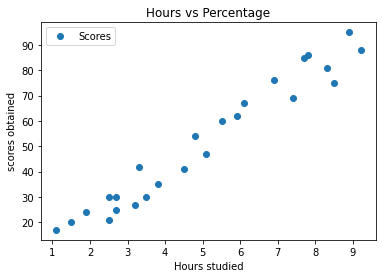

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('scores obtained')
plt.title('Hours vs Percentage')
plt.show()

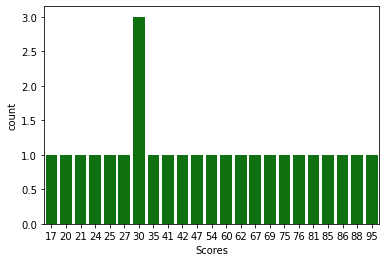

In [10]:
sns.countplot(x='Scores',data=df,color='green')

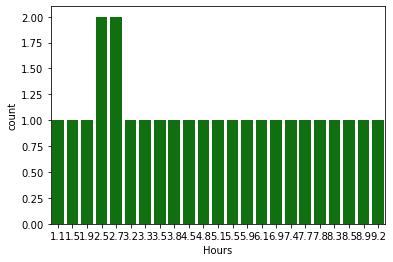

In [11]:
sns.countplot(x='Hours',data=df,color='green')

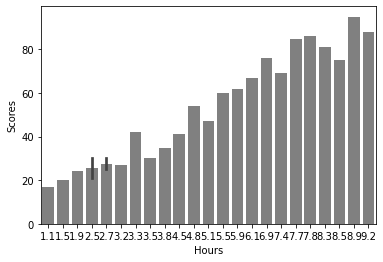

In [12]:
sns.barplot(x='Hours',y='Scores',data=df, color='grey')

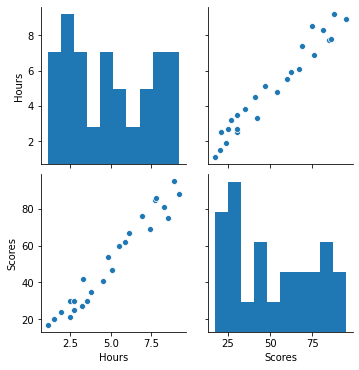

In [13]:
sns.pairplot(df)

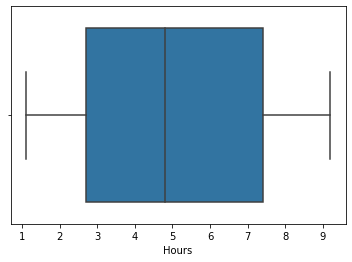

In [14]:
sns.boxplot(x='Hours',data=df)

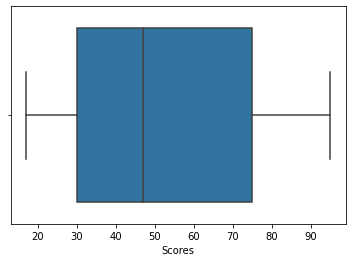

In [15]:
sns.boxplot(x='Scores',data=df)

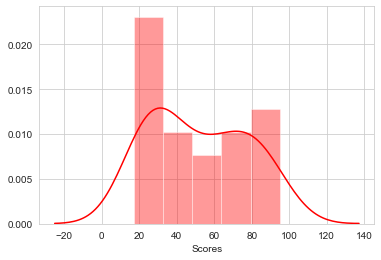

In [16]:
sns.set_style('whitegrid') 
sns.distplot(df['Scores'],kde =True, color ='red', bins = 5) 

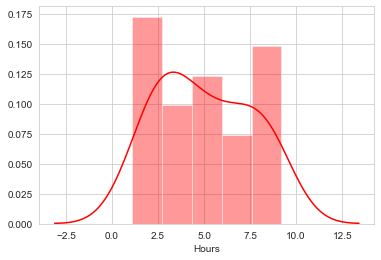

In [17]:
sns.set_style('whitegrid') 
sns.distplot(df['Hours'],kde =True, color ='red', bins = 5) 

In [18]:
#Preparing the data
X=df.iloc[:,:-1].values


In [19]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [20]:
y=df.iloc[:,1].values

In [21]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [23]:
X_train


array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [24]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [25]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [26]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [27]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [28]:
lm.fit(X_train,Y_train)

LinearRegression()

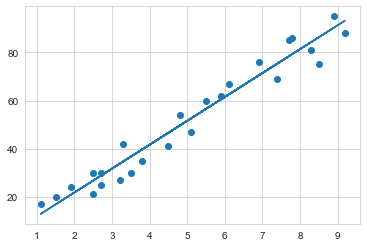

In [29]:

# Plotting the regression line

l=lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X,l)
plt.show()

In [30]:
print(lm.intercept_)

2.018160041434683


In [31]:
print(lm.coef_)

[9.91065648]


In [32]:
y_predict=lm.predict(X_test)

In [33]:
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [34]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [35]:
#Making Predictions
df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


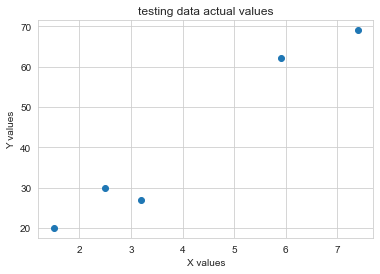

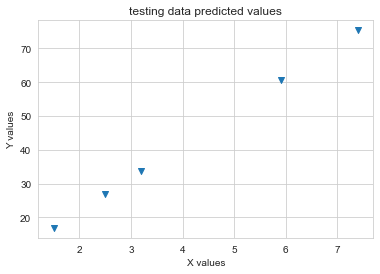

In [36]:
plt.scatter(X_test,Y_test)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('testing data actual values')
plt.show()



plt.scatter(X_test,y_predict,marker='v')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('testing data predicted values')
plt.show()



In [37]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse=mean_squared_error(Y_test,y_predict)
r_squared=r2_score(Y_test,y_predict)
from math import sqrt
rmse =sqrt(mse)
mae=mean_absolute_error(Y_test,y_predict)

In [38]:
print(mse)

21.5987693072174


In [39]:
print(r_squared)

0.9454906892105356


In [40]:
print(rmse)

4.6474476121003665


In [41]:
print(mae)

4.183859899002975


In [42]:

y_predict=lm.predict([[9.25]])

In [43]:
y_predict



array([93.69173249])